# WeRateDogs Twitter Analysis Project

## Introduction

The goal of the project is to analyze a famous Twitter account - WeRateDogs that rates people’s dogs with a humorous comment about the dogs by gathering data from Twitter, wrangling data, analyzing, and finally visualizing data to show insights and create a comprehensive and trustworthy report. 

## Inspiration and Hypothesis
There are two major ideas I plan to explore from the analysis.

First, I want to know if there is any correlation between favorite and retweet. So, I made the hypothesis that more favorites tend to have more retweets. Then I’ll test my hypothesis through regression model.

Second, I want to find the factors that contribute to more favorites and retweets and higher rating. So, I assume that the dogs’ profiles (e.g. dog gender, dog breed, dog stage), tweet time, content have positive correlations with favorites, retweets and rating. I first see the basic information on this Twitter account through univariate exploration of data (Q1 - Q3). Then, I further explore insights through bivariate and multivariate visualizations (Q4 - Q11) to see the relationship between different attritubes.

## Analysis and Visualization

In [107]:
twitter_archive_master.describe()

rating_numerator  rating_denominator      img_num      p1_conf  \
count       1284.000000              1284.0  1284.000000  1284.000000   
mean          12.177196                10.0     1.185358     0.587786   
std           50.615360                 0.0     0.538382     0.273605   
min            1.000000                10.0     1.000000     0.044333   
25%           10.000000                10.0     1.000000     0.354800   
50%           11.000000                10.0     1.000000     0.579762   
75%           12.000000                10.0     1.000000     0.838215   
max         1776.000000                10.0     4.000000     1.000000   

            p2_conf       p3_conf  favorite_count  retweet_count  
count  1.284000e+03  1.284000e+03     1284.000000    1284.000000  
mean   1.373044e-01  6.131988e-02     8231.781931    2490.821651  
std    1.022429e-01  5.203010e-02    11490.714741    4017.430545  
min    1.011300e-08  1.740170e-10       80.000000      12.000000  
25%    5.419487e-02  1.646350e-02     1682.750000     571.250000  
50%    1.203515e-01  4.938480e-02     3778.000000    1241.500000  
75%    1.994975e-01  9.465185e-02    10136.000000    2958.500000  
max    4.676780e-01  2.710420e-01   127390.000000   61166.000000

In [108]:
twitter_archive_master['p2_conf'].mean(),twitter_archive_master['p3_conf'].mean()

(0.13730438335289197, 0.06131988089893851)

`According to the above summary, we can get some information:
The mean of rating is 12.23/10 and a outliner is 1776/10, which needs to review respectively.
The mean of favorite count of tweets is 8,243 and the maximum is 127,536.
The mean of retweet count of tweets is 2,494 and the maximum is 61,267.
The p1_dog has the highest average prediction score 0.588.`


## Questions to be answered:
1. Which gender tweet most on this account?<br>
2. What is the distribution of the stage of dogs?<br>
3. Which channels do users come from, according to the tweet sources? <br>
4. Is there any correlation between favorite and retweet? <br>
5. What is the pattern of favorite and retweet at different dog stages?<br>
5. What is the relationship between favorite and retweet with different rating? <br>
6. Which time, day, and month the users tweet, retweet and favorite most?<br> 
7. The pattern of rating over time
8. Who are those who have higher rating? Why would they get the higher rating?<br>
9. Who got the lower rating? Why?<br>
10. What are the top 5 popular breeds of dog? <br>
11. What are the top 5 popular breeds of dog, based on favorites and retweets? 


###  Which gender tweet most on this account?

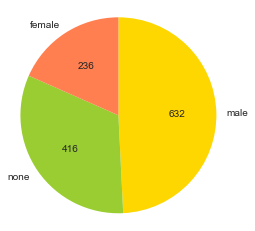

`Note: More tweets about male dogs (632) tweet on this account than female dogs.`

### What is the distribution of the stage of dogs?
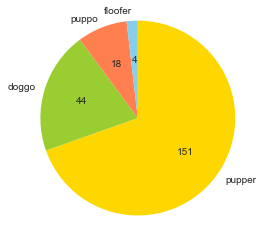

`Note: There are the greatest tweet number about pupper on the acconut, which is 151.`

### Which channels do users come from, acccording to the tweet sources? 
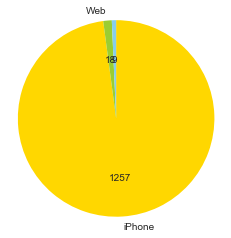

`Note: Most tweets are from iphone.`

### Which time, day, month, and year do the users tweet most?
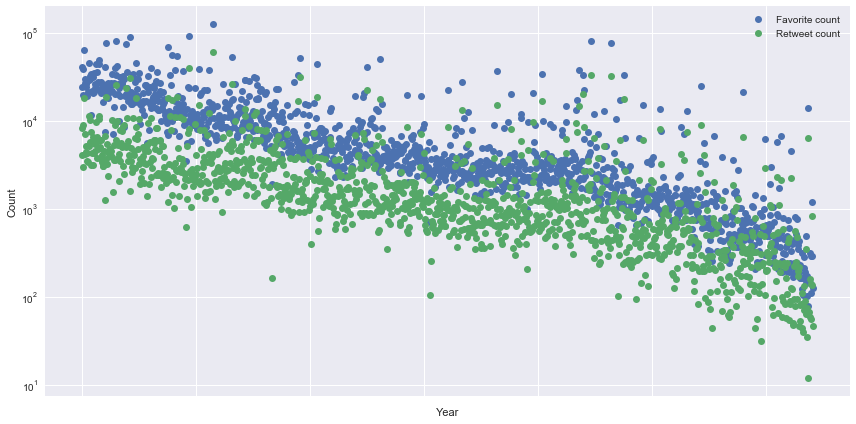

`Note: 
There are 443 favorite counts in 2015, 639 in 2016, and 202 in 2017.
The favorite and retweet counts somehow represents user's active rate, and hence, based on the above year plot, it shows that the users' active increases over year, though there are several high favorite counts in the previous year.`

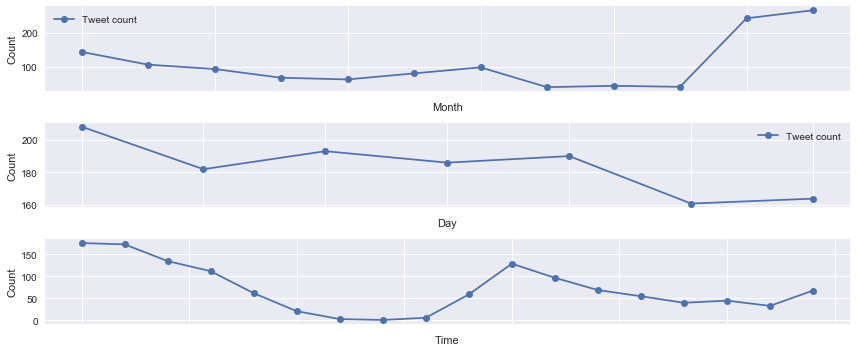

`Note: 
People tend to react actively on this account during holidays (e.g. Thanksgiving, Xmas), from November to January.`<br>
`In addition to month aspect, it seems that people are more active on the account on Monday.`<br>
`The most active time period is at 12 am, or 16 pm.`

#### Is there any correlation between favorite and retweet count? 
Intuitively, we assume that tweets with more favorites are correspondent to the ones with more retweets. So, we are going to see if the hypothesis is correct by checking the coorelation.
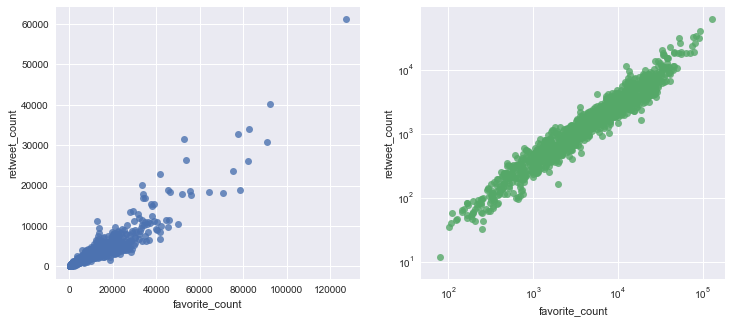

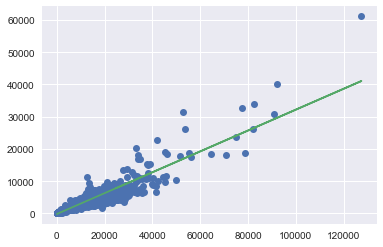
**Line Equation: retweets = (0.32383815747192485)*favorites + -174.94344230569868 <br>
Correlation of line of best fit: 0.9262467262190127**
<br>
<br>
`Note:
According to the 1st plot, the favorite count and retweet count have highly postive correlation. It means that the tweets with the higher favorite counts tend to have higher retweet counts. `

`Then we further look to its regression line by using stats.linregress(), we found that the line equation of these two attritubes is "0.3238*favorites - 174.94", following with the correlation of line best fit is 0.9262.  It appears that most tweets have less than 40,000 favorites and less than 20,000 retweets. According to the line of best fit, it tends to be 3 times as many favorite tweets as retweets. `

#### There are two outliners of rating point, so look deeper to find out the reason.

In [119]:
twitter_archive_master[twitter_archive_master['rating_numerator'] > 50]

tweet_id           timestamp     source  \
449   749981277374128128 2016-07-04 15:00:45  TweetDeck   
1087  670842764863651840 2015-11-29 05:52:33     iPhone   

                                                   text  \
449   This is Atticus He's quite simply America af 1...   
1087  After so many requests here you go\n\nGood dog...   

                                          expanded_urls  rating_numerator  \
449   https://twitter.com/dog_rates/status/749981277...            1776.0   
1087  https://twitter.com/dog_rates/status/670842764...             420.0   

      rating_denominator     name gender dog_stage      ...         p1_conf  \
449                   10  Atticus   male      None      ...        0.533941   
1087                  10      NaN   none      None      ...        0.096063   

     p1_dog          p2   p2_conf p2_dog         p3   p3_conf p3_dog  \
449   False  sunglasses  0.080822  False   sunglass  0.050776  False   
1087  False   accordion  0.094075  False  drumstick  0.061113  False   

      favorite_count  retweet_count  
449             5403           2644  
1087           25023           9013  

[2 rows x 28 columns]

`Note:
It found out that the highest rating tweet posted on National Day, 7/4, and the dog in the tweet is also related to it, so it wins users' attentions.`<br>
`The other tweet with second high rating is about one of the most famous celebrity in US who named dogg, rather than real dog. Due to the creativity of this tweet, it also wins the like from users.`

#### What is the pattern of favorites and retweets at different dog stages?
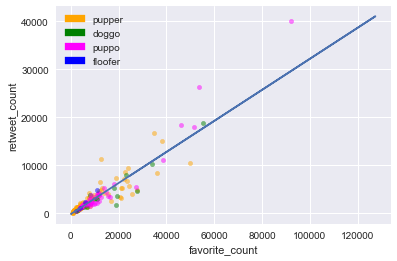

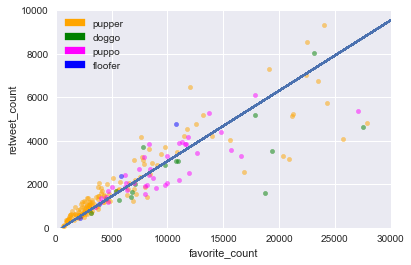

`Note:
Since we found that most of tweet with different dog stages are under 30000 favorites and 10000 retweets (more favorites than retweets), according to the first plot, so we further examine the tweets in this range. `

`Based on the second plot, most of tweets at the dog stage of pupper receive fewer favorites and retweets, which tend to be less than 5000 favorites and 2000 retweets. By contrast, the tweets at the dog stage of puppo have more favorites and retweets and so does doggo. It is likely that the tweets with doggo, the more mature dog, tend to receive more attentions (favorites and retweets) than those of pupper, the younger dog.`

#### What is the relationship between favorite and retweet with different rating?

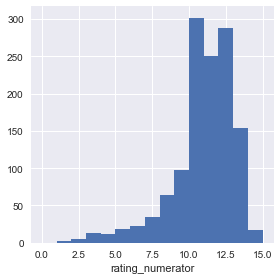

`Most of tweets got the rating at 10-13.`

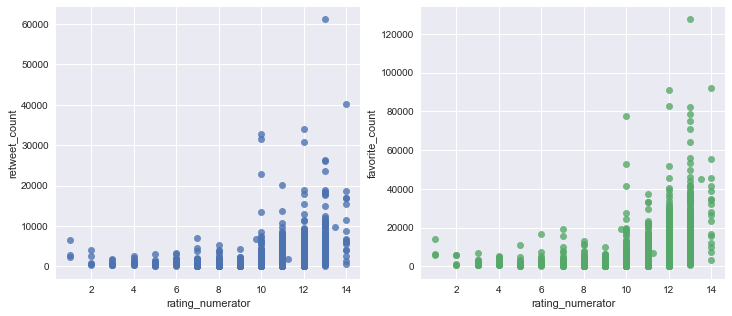

`Note:
The higher rating tends to have the more retweet and like, but the highest rating is not the tweet with the highest retweet or like is not necessary. There is no exact positive or negative correlation.`

#### The pattern of rating over time 

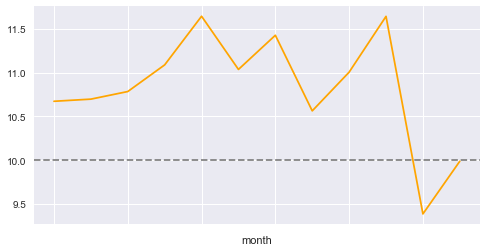

`Note:
Surprisingly, the average rating of tweets on November is the lowest because all the tweets with the lowest rating are on November.`

#### Who got the lower rating? Why? 

1."What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://tco/RDXCfk8hK0"<br>
2.'Never seen dog like this Breathes heavy Tilts head in a pattern No bark Shitty at fetch Not even cordless 1/10 https://tco/i9iSGNn3fx'<br>
3."Not familiar with this breed No tail (weird) Only 2 legs Doesn't bark Surprisingly quick Shits eggs 1/10 https://tco/Asgdc6kuLX"

`Note: The tweets with lowest rating are because the tweet is not related to dog at all.`

#### What are the top 5 popular breeds of dog, based on tweet count?

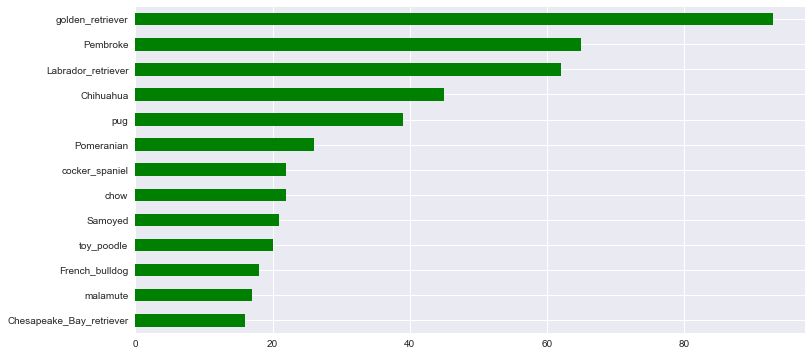

golden_retriever      93 <br>
Pembroke              65<br>
Labrador_retriever    62<br>
Chihuahua             45<br>
pug                   39<br>

`Note: The top 5 breeds of dog with higher tweets are Golden_retriever, Pembroke, Labrador_retriever, Chihuahua, Pug.`

#### What are the top 5 popular breeds of dog, based on favorites and retweets?

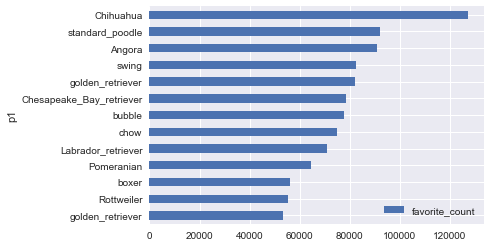

`Note:
Based on the above two charts, the top 5 breeds of favorites and retweets are different from those of tweet counts. It is somewhat out of expectation because it is assumed that the most common dog breed is supposed to have more favorites and retweets, while it seems not like that on the plots. Why? Maybe it is because the less common breeds attracts people's attention more in part due to its uniqueness or people's curiosities. Or it is likely that the prediction from neraul network still is not much precise, so some breeds could not be distinguished from the prediction or be wrongly predicted. Is it related to the user behavior or related to the accuracy of prediction of breeds? It is worth to dig out the reasons behind the patterns afterwards.
`

#### Based on the top 5 common breeds, how many favorites, retweets, and rating they got? Any different between different gender?
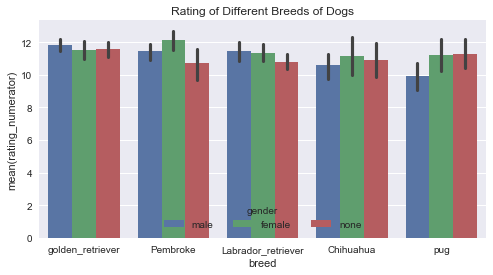

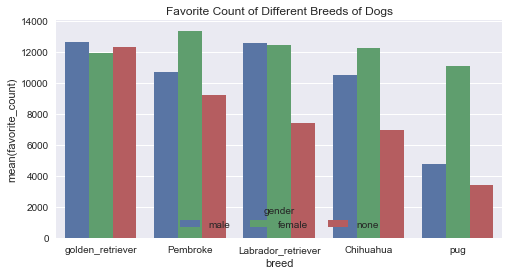

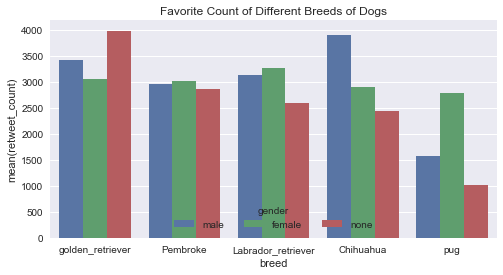

`Note:
The top 5 breeds of dog with higher tweets are Golden_retriever, Pembroke, Labrador_retriever, Chihuahua, Pug. They are all male dogs more than female dogs, but there are nearly equal number of female and male of golden retriever.`
<br>
<br>
    `The first popular breed, golden retriever, tends to have higher favorite and retweet count, but female pembroke has the most favorite counts among female dogs and male chihuahua also has the most retweet counts among male dogs.`


## Conclusion of Analysis
`
Based on the above analysis, it seems that favorites and retweets have positive cooleration. Most of tweets receive favorites 3 times more than retweets. It somehow corresponds to the user behavior that people tend to do more like than retweeting because the action of liking the post is quicker than that of retweeting. 
`
<br>
<br>
`
In terms of the attributes related to favorites, retweets, and rating, it appears that the factors of tweet content, tweet time, and dog profiles (breeds, stages) have more contribution. As a reult, if the account would like to tweet anything to get higher user enegagement rate, it can consider these attributes. For instance, a tweet with the words and image about male golden retriever dogs related to the specific holiday, such as National Day or Christmas, at midnight on Monday on November or December is more likely to get more attentions and more retweet and like from users on Twitter.
`